## Install modules to environment

In [1]:
%pip install pandas numpy requests importlib seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


## Import modules

In [2]:
from Backtesting.dataFetchers.marketDataFetchers import CoinbaseFetcher
from Backtesting.dataFetchers.onChainMetricsFetchers import CryptoQuantFetcher
from Backtesting.dataFetchers.onChainMetricsFetchers import CryptoQuantFetcherWithoutExchange
from Backtesting.backtest import Backtest
from Backtesting.strategies.marketRegimeStrategy import MarketRegimeStrategy

from datetime import datetime



## Fetch Data

Input API key and desired interval and window

In [3]:
API_KEY = "GlYxSZP9hnooNl6gGAjtkptkeqehSnk5C60Akhpw5zupBK6O"
LIMIT = 1000


### Market Data

In [4]:
MARKET_DATA_BASE_URL = "https://api.datasource.cybotrade.rs/coinbase/candle"

SYMBOL = "BTC-USD" # Can be any symbol available on Coinbase
INTERVAL = "1h" # Can be any interval such as "1d", "1h", "15m", etc.

In [5]:
# start_time = int(datetime(2023, 1, 1).timestamp() * 1000)
# end_time = int(datetime(2024, 12, 31, 23, 59).timestamp() * 1000)

bt_start_time = int(datetime(2025, 1, 1).timestamp() * 1000)
bt_end_time = int(datetime(2025, 2, 1, 23, 59).timestamp() * 1000)


In [6]:
market_data_fetcher = CoinbaseFetcher(API_KEY, MARKET_DATA_BASE_URL, SYMBOL, LIMIT)
market_data_fetcher.fetch(bt_start_time, bt_end_time, INTERVAL)



Fetching 1h data for BTC-USD from 2024-12-31 16:00:00 to 2025-02-01 15:59:00...
✅ Retrieved 1000 candles. Total: 1000
💾 Saved to datasets/BTC-USD_1h_Training data_1739260800000_to_1738425540000.csv with 1000 rows.
                         open      high       low     close      volume
timestamp                                                              
2025-02-11 03:00:00  97787.69  97796.85  97500.00  97630.42   84.345552
2025-02-11 04:00:00  97630.42  98232.79  97568.86  98085.23  141.116882
2025-02-11 05:00:00  98085.23  98500.00  98027.69  98443.12  277.663043
2025-02-11 06:00:00  98449.56  98500.00  98146.55  98443.69  112.050681
2025-02-11 07:00:00  98438.68  98480.15  98270.35  98282.91  199.445262


### On Chain Metrics Data (TBU)

In [7]:
ONCHAIN_API_KEY = "GlYxSZP9hnooNl6gGAjtkptkeqehSnk5C60Akhpw5zupBK6O"
ONCHAIN_DATA_BASE_URL = "https://api.datasource.cybotrade.rs/cryptoquant"
EXCHANGE = "binance" # Can be any exchange available on CryptoQuant
CURRENCY = "btc" # Can be any symbol available on CryptoQuant
ON_CHAIN_LIMIT = 20000 # Number of data points to fetch


netflow_window = "hour" # Can be any window such as "day", "hour", "block", etc
netflow_endpoint_category = "exchange-flows"
netflow_metric = "netflow"

mvrv_window = "day"
mvrv_endpoint_category = "market-indicator"
mvrv_metric = "mvrv"

sopr_window = "day"
sopr_endpoint_category = "market-indicator"
sopr_metric = "sopr-ratio"

nupl_window = "day"
nupl_endpoint_category = "network-indicator"
nupl_metric = "nupl"

cdd_window = "day"
cdd_endpoint_category = "network-indicator"
cdd_metric = "cdd"

puell_multiple_window = "day"
puell_multiple_endpoint_category = "network-indicator"
puell_multiple_metric = "puell-multiple"

hashrate_window = "hour"
hashrate_endpoint_category = "network-data"
hashrate_metric = "hashrate"


In [8]:
on_chain_fetcher = CryptoQuantFetcher(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, netflow_endpoint_category, netflow_metric, EXCHANGE, ON_CHAIN_LIMIT)
on_chain_fetcher.fetch_netflow(netflow_window, bt_start_time, bt_end_time)

on_chain_fetcher_without_exchange_mvrv = CryptoQuantFetcherWithoutExchange(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, mvrv_endpoint_category, mvrv_metric, ON_CHAIN_LIMIT)
on_chain_fetcher_without_exchange_sopr = CryptoQuantFetcherWithoutExchange(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY,  sopr_endpoint_category, sopr_metric, ON_CHAIN_LIMIT)
on_chain_fetcher_without_exchange_nupl = CryptoQuantFetcherWithoutExchange(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, nupl_endpoint_category, nupl_metric, ON_CHAIN_LIMIT)
on_chain_fetcher_without_exchange_cdd = CryptoQuantFetcherWithoutExchange(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, cdd_endpoint_category, cdd_metric, ON_CHAIN_LIMIT)
on_chain_fetcher_without_exchange_puell_multiple = CryptoQuantFetcherWithoutExchange(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, puell_multiple_endpoint_category, puell_multiple_metric, ON_CHAIN_LIMIT)
on_chain_fetcher_without_exchange_hashrate = CryptoQuantFetcherWithoutExchange(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, hashrate_endpoint_category, hashrate_metric, ON_CHAIN_LIMIT)
on_chain_fetcher_without_exchange_mvrv.fetch_mvrv(mvrv_window, bt_start_time, bt_end_time)
on_chain_fetcher_without_exchange_sopr.fetch_sopr(sopr_window, bt_start_time, bt_end_time)
on_chain_fetcher_without_exchange_nupl.fetch_nupl(nupl_window, bt_start_time, bt_end_time)
on_chain_fetcher_without_exchange_cdd.fetch_cdd(cdd_window, bt_start_time, bt_end_time)
on_chain_fetcher_without_exchange_puell_multiple.fetch_puell_multiple(puell_multiple_window, bt_start_time, bt_end_time)
on_chain_fetcher_without_exchange_hashrate.fetch_hashrate(hashrate_window, bt_start_time, bt_end_time)

Fetching exchange-flows/netflow data for btc from binance with window 'hour'...
Using start_time + limit=1000 from 2024-12-31 16:00:00
✅ Retrieved 1000 records. Total so far: 1000
💾 Saved to datasets/binance_netflow_hour_Training data_1735660800000_to_1738425540000.csv with 1000 rows.
                     netflow_total
timestamp                         
2025-02-11 03:00:00    1019.021218
2025-02-11 04:00:00     -33.755179
2025-02-11 05:00:00     -80.849584
2025-02-11 06:00:00     258.424643
2025-02-11 07:00:00    -698.573172
Fetching market-indicator/mvrv data for btc with window 'day'...
Using start_time + limit=1000 from 2024-12-31 16:00:00
✅ Retrieved 101 records. Total so far: 101
💾 Saved to datasets/mvrv_day_Training data_1735660800000_to_1738425540000.csv with 101 rows.
                mvrv
timestamp           
2025-04-07  1.805533
2025-04-08  1.740237
2025-04-09  1.883966
2025-04-10  1.813297
2025-04-11  1.900316
Fetching market-indicator/sopr-ratio data for btc with window 'day

## Perform Backtesting

In [9]:
bt = Backtest(market_data_fetcher.saved_filepath, MarketRegimeStrategy(market_data_fetcher.saved_filepath, market_data_fetcher.saved_filepath, 0.5, 0.5), 100000, 30, 0.0006)

         1  -98940.13283137             +nan
         2  -91767.03299784   +7173.09983353
         3  -91681.00599813     +86.02699971
         4  -91616.87458439     +64.13141374
         5  -91594.62224550     +22.25233888
         6  -91584.69862072      +9.92362478
         7  -91568.48532565     +16.21329507
         8  -91560.54061247      +7.94471318
         9  -91555.49831283      +5.04229964
        10  -91554.06837808      +1.42993475
        11  -91553.92635752      +0.14202057
        12  -91553.93784662      -0.01148910
Model is not converging.  Current: -91553.93784662109 is not greater than -91553.92635751629. Delta is -0.01148910479969345


Converged: True
Final log likelihood: -91553.93784662109
State Labels: {2: 'bullish', 1: 'bearish', 0: 'neutral'}
              timestamp      open     close  log_return  state market_state
25  2025-01-01 17:00:00  93877.70  93924.22    0.000495      2      bullish
26  2025-01-01 18:00:00  93922.41  94123.99    0.002125      2      bullish
27  2025-01-01 19:00:00  94119.22  94434.89    0.003298      2      bullish
28  2025-01-01 20:00:00  94427.86  94597.57    0.001721      2      bullish
29  2025-01-01 21:00:00  94591.04  94776.87    0.001894      2      bullish
..                  ...       ...       ...         ...    ...          ...
995 2025-02-11 03:00:00  97787.69  97630.42   -0.001609      0      neutral
996 2025-02-11 04:00:00  97630.42  98085.23    0.004648      0      neutral
997 2025-02-11 05:00:00  98085.23  98443.12    0.003642      0      neutral
998 2025-02-11 06:00:00  98449.56  98443.69    0.000006      0      neutral
999 2025-02-11 07:00:00  98438.68  98282.91   -0.0

## Identify the best threshold from heatmap

bullish range:  [0.4  0.45 0.5  0.55 0.6  0.65 0.7 ]
bearish range:  [0.3  0.35 0.4  0.45 0.5  0.55 0.6 ]
Running with bullish=0.40, bearish=0.30
1000
{'Start Trade Date': '2024-12-31 16:00:00', 'End Trade Date': '2025-02-11 07:00:00', 'Final Portfolio Value': np.float64(107354.00849000001), 'Total Return (%)': np.float64(7.354008490000008), 'Number of Trades': 14, 'Win Rate (%)': 0.0, 'Max Drawdown (%)': np.float64(-0.99), 'Sharpe Ratio': np.float64(0.8)}
Result for bullish=0.40, bearish=0.30: 0.8
Running with bullish=0.40, bearish=0.35
1000
{'Start Trade Date': '2024-12-31 16:00:00', 'End Trade Date': '2025-02-11 07:00:00', 'Final Portfolio Value': np.float64(107354.00849000001), 'Total Return (%)': np.float64(7.354008490000008), 'Number of Trades': 14, 'Win Rate (%)': 0.0, 'Max Drawdown (%)': np.float64(-0.99), 'Sharpe Ratio': np.float64(0.8)}
Result for bullish=0.40, bearish=0.35: 0.8
Running with bullish=0.40, bearish=0.40
1000
{'Start Trade Date': '2024-12-31 16:00:00', 'End Trad

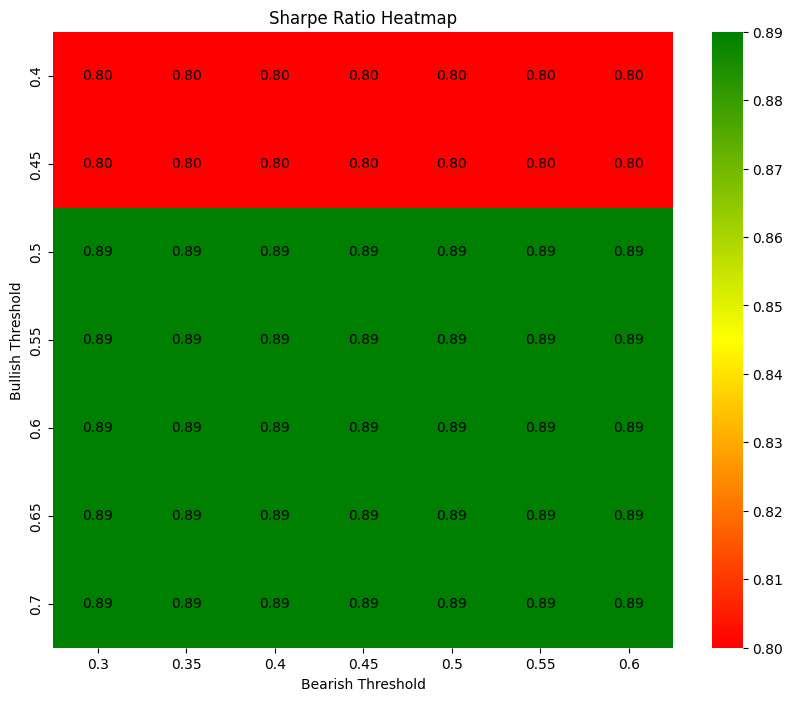

In [10]:
bt.run_backtest_heatmap(metric='Sharpe Ratio')


## Perform Forward Testing Using The Best Threshold

### Fetch / Load Foward Dataset

In [11]:

ft_start_time = int(datetime(2025, 3, 1).timestamp() * 1000)
ft_end_time = int(datetime(2025, 4, 1, 23, 59).timestamp() * 1000)


In [12]:
market_data_fetcher = CoinbaseFetcher(API_KEY, MARKET_DATA_BASE_URL, SYMBOL, LIMIT)
market_data_fetcher.fetch(ft_start_time, ft_end_time, INTERVAL)



Fetching 1h data for BTC-USD from 2025-02-28 16:00:00 to 2025-04-01 15:59:00...
✅ Retrieved 1000 candles. Total: 1000
💾 Saved to datasets/BTC-USD_1h_Training data_1744358400000_to_1743523140000.csv with 1000 rows.
                         open      high       low     close      volume
timestamp                                                              
2025-04-11 03:00:00  80254.20  80868.22  80245.70  80801.48  218.720728
2025-04-11 04:00:00  80801.48  81060.99  80676.45  80842.85  237.797444
2025-04-11 05:00:00  80840.66  80870.76  80462.64  80774.42  194.938546
2025-04-11 06:00:00  80774.43  81268.16  80774.43  81056.21  146.487724
2025-04-11 07:00:00  81057.09  81396.94  80796.09  81224.99  151.087371


In [17]:
bt.set_data(market_data_fetcher.saved_filepath)
bt.set_strategy(MarketRegimeStrategy(market_data_fetcher.saved_filepath, market_data_fetcher.saved_filepath, bullish_threshold=0.7, bearish_threshold=0.3))

         1  -99861.15453792             +nan
         2  -94539.40969463   +5321.74484329
         3  -93615.12880254    +924.28089209
         4  -91311.80000358   +2303.32879896
         5  -90397.92270747    +913.87729611
         6  -90341.76657683     +56.15613064
         7  -90330.35672943     +11.40984740
         8  -90326.90277480      +3.45395462
         9  -90321.63029984      +5.27247496
        10  -90292.91294995     +28.71734989
        11  -90286.56752197      +6.34542799
        12  -90282.58502893      +3.98249304
        13  -90281.48543210      +1.09959683
        14  -90281.31756847      +0.16786363
        15  -90281.19050546      +0.12706301
        16  -90281.05420314      +0.13630233
        17  -90280.91686483      +0.13733830
        18  -90280.71285253      +0.20401230
        19  -90280.32182658      +0.39102595
        20  -90279.95265334      +0.36917324
        21  -90280.01455794      -0.06190461
Model is not converging.  Current: -90280.01455794461 i

Converged: True
Final log likelihood: -90280.01455794461
State Labels: {2: 'bullish', 1: 'bearish', 0: 'neutral'}
              timestamp      open     close  log_return  state market_state
25  2025-03-01 17:00:00  85225.41  85164.06   -0.000720      2      bullish
26  2025-03-01 18:00:00  85164.05  85269.34    0.001235      2      bullish
27  2025-03-01 19:00:00  85270.24  85438.94    0.001987      2      bullish
28  2025-03-01 20:00:00  85441.88  85501.54    0.000732      2      bullish
29  2025-03-01 21:00:00  85501.53  86039.19    0.006269      2      bullish
..                  ...       ...       ...         ...    ...          ...
995 2025-04-11 03:00:00  80254.20  80801.48    0.006796      0      neutral
996 2025-04-11 04:00:00  80801.48  80842.85    0.000512      0      neutral
997 2025-04-11 05:00:00  80840.66  80774.42   -0.000847      0      neutral
998 2025-04-11 06:00:00  80774.43  81056.21    0.003483      0      neutral
999 2025-04-11 07:00:00  81057.09  81224.99    0.0

In [18]:
bt.run()

1000


In [19]:
performance = bt.get_performance_results()

for key, value in performance.items():
    print(f"{key}: {value}")

Start Trade Date: 2025-02-28 16:00:00
End Trade Date: 2025-04-11 07:00:00
Final Portfolio Value: 101147.08327600008
Total Return (%): 1.1470832760000775
Number of Trades: 34
Win Rate (%): 0.0
Max Drawdown (%): -2.19
Sharpe Ratio: -0.96


In [20]:
bt.get_trade_logs_csv()

Trade logs saved to backtest_trade_logs.csv
